In [20]:
import pandas as pd
%matplotlib inline
%config InlineBackend.figure_formats=['svg']

In [21]:
ls

 O volume na unidade D ‚ Novo volume
 O N£mero de S‚rie do Volume ‚ 9EB8-09AE

 Pasta de D:\OneDrive\datascience\datascience_course\1-analise-explorat¢ria-basica\03-pandas

26/01/2019  15:52    <DIR>          .
26/01/2019  15:52    <DIR>          ..
26/01/2019  15:52    <DIR>          .ipynb_checkpoints
26/01/2019  15:52    <DIR>          data
26/01/2019  08:30    <DIR>          img
11/01/2019  10:38            12.954 pandas101.ipynb
26/01/2019  15:52            74.033 pandas102.ipynb
               2 arquivo(s)         86.987 bytes
               5 pasta(s)   253.047.848.960 bytes dispon¡veis


In [22]:
%time df = pd.read_csv(r'./data/data.zip')

Wall time: 133 ms


In [23]:
df.describe()

,Unnamed: 0,id,idade,anos_estudo,salario,estado_civil
count,66470.000000,6.647000e+04,66470.000000,66036.000000,47878.000000,66470.000000
mean,33234.500000,3.445307e+10,37.634813,8.686065,19706.790323,0.587724
std,19188.380534,1.292491e+10,11.380158,3.374522,88627.532024,0.492248
min,0.000000,1.100190e+10,20.000000,5.000000,-1.000000,0.000000
25%,16617.250000,3.110060e+10,28.000000,5.000000,3780.000000,0.000000
50%,33234.500000,3.316781e+10,37.000000,8.000000,7113.599609,1.000000
75%,49851.750000,4.310361e+10,47.000000,11.000000,12720.000000,1.000000
max,66469.000000,5.311702e+10,60.000000,15.000000,999999.000000,1.000000


In [24]:
df.shape

(66470, 9)

In [25]:
df.head()

,Unnamed: 0,id,idade,sexo,anos_estudo,cor/raca,salario,estado_civil,regiao
0,0,1.100190e+10,53,homem,5.0,Parda,63600.000000,1.0,norte
1,1,1.100190e+10,49,mulher,8.0,Amarela,NaN,1.0,norte
2,2,1.100190e+10,22,mulher,11.0,Indigena,4352.400391,0.0,nordeste
3,3,1.100190e+10,55,homem,15.0,Amarela,96600.000000,1.0,norte
4,4,1.100190e+10,56,mulher,15.0,Amarela,157800.000000,1.0,norte


In [26]:
df.tail()

,Unnamed: 0,id,idade,sexo,anos_estudo,cor/raca,salario,estado_civil,regiao
66465,66465,5.311702e+10,34,mulher,5.0,Branca,NaN,1.0,centro-oeste
66466,66466,5.311702e+10,40,homem,5.0,Parda,2425.000000,1.0,centro-oeste
66467,66467,5.311702e+10,36,mulher,5.0,Parda,2425.000000,1.0,centro-oeste
66468,66468,5.311702e+10,27,mulher,5.0,Branca,5524.200195,1.0,centro-oeste
66469,66469,5.311702e+10,37,homem,5.0,Preta,460.350006,1.0,centro-oeste


In [27]:
df.describe()

,Unnamed: 0,id,idade,anos_estudo,salario,estado_civil
count,66470.000000,6.647000e+04,66470.000000,66036.000000,47878.000000,66470.000000
mean,33234.500000,3.445307e+10,37.634813,8.686065,19706.790323,0.587724
std,19188.380534,1.292491e+10,11.380158,3.374522,88627.532024,0.492248
min,0.000000,1.100190e+10,20.000000,5.000000,-1.000000,0.000000
25%,16617.250000,3.110060e+10,28.000000,5.000000,3780.000000,0.000000
50%,33234.500000,3.316781e+10,37.000000,8.000000,7113.599609,1.000000
75%,49851.750000,4.310361e+10,47.000000,11.000000,12720.000000,1.000000
max,66469.000000,5.311702e+10,60.000000,15.000000,999999.000000,1.000000


In [28]:
type(df)

pandas.core.frame.DataFrame

In [29]:
type(df['salario'])

pandas.core.series.Series

In [30]:
type(df[['salario']])

pandas.core.frame.DataFrame

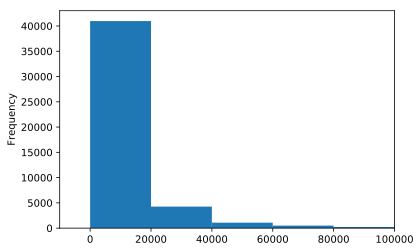

In [36]:
df['salario'].plot.hist(bins=50, xlim=(-10000, 100000))

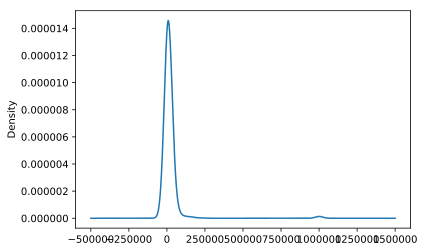

In [32]:
df['salario'].sample(1000).plot.kde()

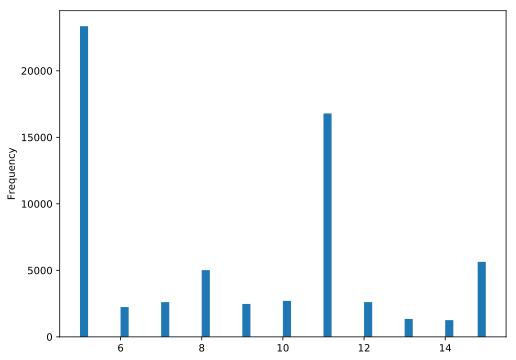

In [40]:
df.anos_estudo.plot.hist(bins=50, figsize=(8,6))

In [24]:
df.head()

,rider_id_x,rider_fee,origin_latitude,origin_longitude,logistic_region,distance_origin_destination,distance_origin,expected_delivery_time,delivery_date_local,expected_delivery_time_min,real_delivery_time_min,time_to_confirm_min,time_to_assign_min,time_to_accept_min,time_to_origin_min,time_at_origin_min,time_in_standby_min,time_to_destination_min,time_at_destination_min
0,1515,8.9,-30.030975,-51.231535,Porto Alegre,781.0,0.78,0 days 00:34:59.466000000,2018-09-06T15:32:40.637Z,34.991100,29.848850,2.534367,0.369483,0.000000,3.627300,10.142583,0.0,13.540167,8.640600
1,6885,8.9,-22.973995,-43.188620,Rio - Zona Sul,845.0,4.33,0 days 00:39:59.617000000,2018-09-23T19:37:43.494Z,39.993617,39.709833,0.424750,28.394200,0.089917,7.104267,3.127733,0.0,0.568967,9.248500
2,604,12.9,-15.774803,-47.885519,Brasilia,6633.0,2.14,0 days 01:04:59.378000000,2018-09-07T13:00:29.639Z,64.989633,49.902567,0.530383,0.324500,0.499350,7.985383,13.056350,0.0,27.506600,2.030917
3,1236,9.9,-25.438178,-49.266473,Curitiba,2196.0,3.92,0 days 00:39:59.231000000,2018-09-09T19:35:35.349Z,39.987183,39.114800,0.455317,9.362050,0.092817,7.272967,5.187867,0.0,16.743783,2.726683
4,22828,8.9,-22.948660,-43.184058,Rio - Zona Sul,609.0,2.67,0 days 00:39:59.201000000,2018-11-08T21:00:56.439Z,39.986683,36.101350,0.638017,0.318883,0.204617,8.698183,19.631133,0.0,6.610517,0.560167


In [25]:
df['rider_fee'].sum()

10738550.000000007